### HEI AUDIT OF FAILED PMTCT

This is a retrospective analysis of HIV Exposed Infant (HEI) audit conducted at 16 facilities in Kirinyaga county, which provides health services to families of children affected by HIV. The study objects were HEI children 0 to 48 months old whose samples we had collected between 2017-2021. We classified children as failed HEI based on their HIV PCR test being positive. We downloaded a line list used to abstract data from the NASCOP's website. We developed a standardized audit tool to collect information from facilities. We included maternal and infant factors, timing and results of the early infant HIV diagnosis, ANC attendance, maternal viremia levels, infant ART prophylaxis, immunization, and follow-up adherence. 

The aim was to characterize factors contributing to MTCT.

### PRELIMINARY FINDINGS

In [1]:
import pandas as pd
import numpy as np
import re

from scipy.stats import fisher_exact
# import plotly.graph_objects as go
# import plotly.express as px
# from plotly.subplots import make_subplots
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# display all columns 
pd.options.display.max_columns = None

# display all columns 
pd.options.display.max_rows = None

from IPython.display import display, HTML


df=pd.read_excel("HEI AUDIT FORM(1-49).xlsx",index_col=None)
# df.head()

In [2]:
df=df.fillna(0)
hospitals=df['FACILITY'].unique()


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
''')

In [4]:
# Make a dictionary from two lists
keys = df['FACILITY'].unique()
values=[]
for facility in hospitals:
    values.append(facility.split(" ")[0])

dictionary = dict(zip(keys, values))

df['FACILITY'] = df['FACILITY'].map(dictionary)

In [5]:
df['counts']=1

In [6]:
hei_audited=sum(df['counts'])
facility=len(df['FACILITY'].unique())

In [7]:
facilities=df.groupby('FACILITY').sum()['counts'].reset_index()
facilities=facilities.sort_values('counts',ascending=False)

In [8]:
df["WHICH TRIMESTER WAS THE 1ST ANC VISIT?"].replace(0,"Never",inplace=True)

df["What is the mother's parity? (eg: 0+0, 1+0 etc...)"].replace({'Para':''}, regex=True,inplace=True)
df["What is the mother's parity? (eg: 0+0, 1+0 etc...)"]=df["What is the mother's parity? (eg: 0+0, 1+0 etc...)"].str.strip()
df["What is the mother's parity? (eg: 0+0, 1+0 etc...)"].unique()
df=df.replace({"What is the mother's parity? (eg: 0+0, 1+0 etc...)" : {
    '1' : "1+0", '2' : "2+0", '3' : "3+0" ,"4":"4+0","5":"5+0","6":"6+0"
}})

df["HOW LONG MOTHER HAS BEEN ON FOLLOW UP (eg: 23months)"].replace({'months':'','Months':''}, regex=True,inplace=True)

df["WHICH TRIMESTER WAS THE 1ST ANC VISIT?"].replace({'4TH':'3RD'}, regex=True,inplace=True)
# df["HOW LONG MOTHER HAS BEEN ON FOLLOW UP (eg: 23months)"].unique()

In [9]:
# linked_df=df[df['INFANT LINKED AND INITIATED ON HAART AFTER  CONFIRMATORY PCR?']=='YES']
# linked_df["which regimen was child initiated on?"].unique()
# df["which regimen was child initiated on?"].replace({',':'/',"pellets":'LPV/r',"\n":""}, regex=True,inplace=True)
# df[['nrtis1','nrtis2','pis','others']] = df["which regimen was child initiated on?"].str.split('/', expand=True)
# df["pis"].replace({',':'/',"pellets":'LPV/r'}, regex=True,inplace=True)
# # df["which regimen was child initiated on?"].replace(" ", "")

# df["which regimen was child initiated on?"] = re.sub(r"\s+", "", df["which regimen was child initiated on?"], flags=re.UNICODE)
# df["which regimen was child initiated on?"].unique()
# df.head()
# df["which regimen was child initiated on?"].unique()


In [10]:
# import re
# mytext = "this is my/string"
# re.sub('/.*','/text',mytext)


In [11]:
# mytext = "this is my/string"
# df['pis'] = df.pis.str.replace(r'(^.*l*$)', 'Lpv/r')

In [12]:
# df['pis'].unique()

In [13]:
# df["which regimen was child initiated on?"]=df['nrtis1']+df['nrtis2']+df['pis']

In [14]:
# df["which regimen was child initiated on?"].unique()

In [15]:
def make_bar_chart(df,x,y,title):
    ax = df.plot.bar(x=x, y=y, rot=0,figsize=(17,5),title=title)

    # annotate my bars
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center',va='center', xytext=(0, 10),textcoords='offset points')
    return ax

In [16]:
# import os
import numpy as np
import matplotlib.pyplot as plt

# x = [u'INFO', u'CUISINE', u'TYPE_OF_PLACE', u'DRINK', u'PLACE', u'MEAL_TIME', u'DISH', u'NEIGHBOURHOOD']
# y = [160, 167, 137, 18, 120, 36, 155, 130]

def bar_charts(df,columna,columnb):
    x=df[columna]
    y=df[columnb]

    fig, ax = plt.subplots()    
    for i, v in enumerate(y):
        ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

    width = 0.75 # the width of the bars 
    ind = np.arange(len(y))  # the x locations for the groups
    ax.barh(ind, y, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(x, minor=False)



    plt.title(columnb)
    plt.xlabel('x')
    plt.ylabel('y')      
    plt.show()
# plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [17]:
def percentages_per_column(df,column_name):
    percentages_per_column=round(df[column_name].value_counts(normalize =True)*100,2).reset_index()
    percentages_per_column[column_name]=percentages_per_column[column_name]#.astype(str)+"%"
    percentages_per_column.columns=['variables',column_name]
    return percentages_per_column

In [18]:
def percentages_per_column_df(df,column_name):
    a=df[column_name].value_counts().reset_index()
    a=a[a['index']!=0].value_counts().reset_index()
    a['total']=round(a[column_name]/sum(a[column_name])*100,1)
    del a[0]
    a.columns=['variables',column_name,"%"]
    a=a.sort_values("%",ascending=False)
    return a

In [19]:
unique_df = df[df.columns.difference([
    "Date HAART was initiated", "Choose the date of the last VL done",
    "CHILD'S CCC UNIQUE NUMBER (10 digit)",
    "NAME OF THE OFFICER SUBMITTING THE REPORT (FIRST NAME ONLY)",
    "Completion time", "DATE OF THE AUDIT", "Email", "ID",
    "PLEASE ENTER PERSONAL OR FACILITY PHONE NUMBER BELOW.", "Start time",
    "WHEN WAS HAART INITIATED?2", "When was 1st PCR was done?", "counts",
    "Choose the regimen Mother was on during ANC2"
])]

# Drop columns whose name contains a specific string from pandas DataFrame
unique_df = unique_df[unique_df.columns.drop(
    list(unique_df.filter(regex='Please')))]

In [20]:
def bars(df, columna):
    bar_charts(percentages_per_column_df, "variables", columna)
    highest_proportion = max(percentages_per_column_df[columna])
    # mean_proportion=mean(percentages_per_column_df["What is the mother's parity? (eg: 0+0, 1+0 etc...)"])

    message = print(F"{columna}: {highest_proportion}%")
    return message

In [21]:
# def quarter_and_df(quarter):
# request for user input
quarter=input("Do you want a detailed crosstab analyzes(YES/NO) ")
# convert string to uppercase
quarter=quarter.upper()
# create a list of allowed choices
allowed=['YES','Y','NO','N']
# check if user input matches the allowed choices
if quarter not in allowed:
    # tell user which choices are needed
    print("Invalid entry... Please use either YES/yes/y or NO/no/n")
    quarter=input("Are you analyzing APR report? (YES/NO) ")
    # convert string to uppercase
    quarter=quarter.upper()
else:
    if (quarter =="YES" or quarter =="Y"):
        detailed=True 
#         print('q4')
    else:
        detailed=False


Do you want a detailed crosstab analyzes(YES/NO) YES


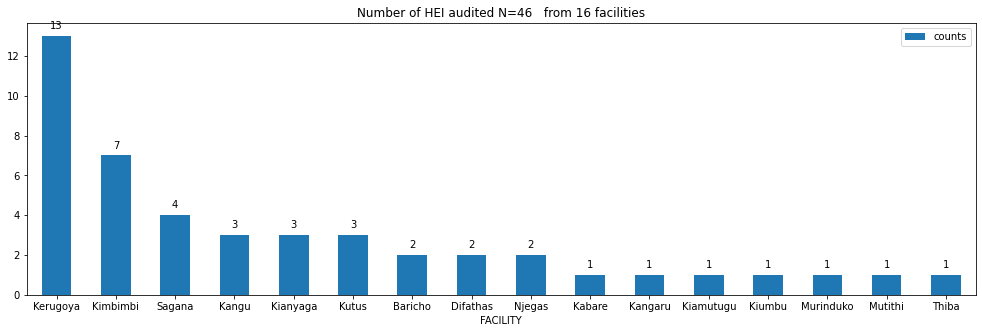

In [22]:
make_bar_chart(facilities,"FACILITY",'counts',f"Number of HEI audited N={hei_audited}   from {facility} facilities");

In [23]:
# loop through the columns
for column in unique_df.columns[8:]:
    display(percentages_per_column_df(unique_df, column))

,variables,CURRENT AGE OF THE MOTHER,%
2,>25 YRS,37,80.4
1,20-24YRS,8,17.4
0,15-19YRS,1,2.2


,variables,Choose the regimen,%
3,TDF/3TC/DTG,16,53.3
4,TDF/3TC/EFV,11,36.7
0,LTFU,1,3.3
1,Mother has passed on.,1,3.3
2,None,1,3.3


,variables,Choose the regimen Mother was initially started on,%
4,TDF/3TC/EFV,34,73.9
3,TDF/3TC/DTG,8,17.4
0,AZT/3TC/LPV/r,2,4.3
1,D4T/3TC/NVP,1,2.2
2,None,1,2.2


,variables,Choose the regimen Mother was on during ANC,%
1,None,22,53.7
6,TDF/3TC/EFV,11,26.8
5,TDF/3TC/DTG,3,7.3
0,D4T/3TC/NVP,1,2.4
2,Not given,1,2.4
3,Not started,1,2.4
4,Not sure whether she attended ANC,1,2.4
7,Was not on treatment,1,2.4


,variables,Choose the regimen2,%
0,AZT/ 3TC/ ATV/r,1,33.3
1,AZT/ 3TC/ATV/r,1,33.3
2,AZT/3TC/ATVr,1,33.3


,variables,Choose the regimen3,%


,variables,DID MOTHER ATTEND 6WKS VISIT POST NATALY?,%
1,YES,36,78.3
0,No,10,21.7


,variables,DID THE MOTHER ATTEND ANC?,%
2,Yes,22,47.8
1,Not sure,15,32.6
0,No,9,19.6


,variables,DISCLOSURE DONE TO HER PARTNER,%
1,YES,18,62.1
0,NO,11,37.9


,variables,DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER?,%
2,YES,29,63.0
1,Not sure,11,23.9
0,NO,6,13.0


,variables,EXCLUSIVE BREASTFEEDING FOR THE FIRST 6 MONTHS?,%
1,YES,43,93.5
0,NO,3,6.5


,variables,EXCLUSIVE REPLACEMENT FEEDING FOR THE FIRST 6 MONTHS?,%
0,NO,14,87.5
1,YES,2,12.5


,variables,EXPLAIN THE REASON WHY CONFIRMATORY PCR WAS NOT DONE,%
0,Client was LTFU,1,14.3
1,Died,1,14.3
2,LTFU resumed after 6mo and antibody was done,1,14.3
3,Mother transferred out to another facility,1,14.3
4,S.T.O,1,14.3
5,The patient was tested antibody test,1,14.3
6,Traced after missing clinic and not found,1,14.3


,variables,FACILITY,%
5,Kerugoya,13,28.3
8,Kimbimbi,7,15.2
14,Sagana,4,8.7
4,Kangu,3,6.5
7,Kianyaga,3,6.5
10,Kutus,3,6.5
0,Baricho,2,4.3
1,Difathas,2,4.3
13,Njegas,2,4.3
2,Kabare,1,2.2


,variables,HOW LONG MOTHER HAS BEEN ON FOLLOW UP (eg: 23months),%
13,30,4,8.7
18,24,4,8.7
0,0,3,6.5
8,48,3,6.5
27,12,3,6.5
16,27,2,4.3
1,1,2,4.3
9,39,2,4.3
6,57,2,4.3
24,15,1,2.2


,variables,INFANT LINKED AND INITIATED ON HAART AFTER CONFIRMATORY PCR?,%
1,YES,41,89.1
0,No,5,10.9


,variables,Immunization status,%
1,On schedule,41,95.3
0,Not on schedule,2,4.7


,variables,LAST KNOWN VIRAL LOAD DONE.,%
1,LDL,10,52.6
0,>=1000 CP/ML,6,31.6
2,NOT DONE,3,15.8


,variables,LAST VIRAL LOAD DONE DURING POST NATAL PERIOD,%


,variables,LAST VIRAL LOAD DONE DURING PREGNACY,%
3,NOT DONE,19,86.4
0,400-999 CP/ML,1,4.5
1,>=1000 CP/ML,1,4.5
2,LDL,1,4.5


,variables,LTFU WITHIN 3 MONTHS OF FOLLOW-UP,%
0,No,41,89.1
1,YES,5,10.9


,variables,MOTHER HAS BEEN ON HIV FOLLOW-UP FOR MORE THAN 3 MONTHS BEFORE COLLECTING PCR?,%
0,No,24,52.2
1,Yes,22,47.8


,variables,MOTHER'S CURRENT HAART REGIME,%
0,1ST LINE,30,90.9
1,2ND LINE,3,9.1


,variables,Name,%


,variables,PLACE OF BIRTH DELIVERY,%
1,HOSPITAL,36,78.3
0,HOME,10,21.7


,variables,Reasons for missing vaccination,%
0,Died,1,50.0
1,Patient was Lost.,1,50.0


,variables,SERVICE DELIVERY POINT WHERE THE INFANT WAS FIRST IDENTIFIED AS HIV EXPOSED,%
1,CWC CLINIC,19,41.3
0,CCC: FAMILY TESTING,14,30.4
2,INPATIENT,10,21.7
3,OPD,3,6.5


,variables,State reason(s) why HEI not linked,%
1,Linked,2,40.0
0,Died,1,20.0
2,Mother got lost to follow,1,20.0
3,To,1,20.0


,variables,State the reason why mother was not started on HAART,%
0,Tested in private and referred to public but ...,1,33.3
1,Ltfu,1,33.3
2,She declined,1,33.3


,variables,VIRAL LOAD DONE IN THE LAST 6 MONTHS,%


,variables,VIRAL LOAD DONE AT THE DIAGNOSIS OF PREGNANCY,%
2,NOT DONE,18,81.8
0,>=1000 CP/ML,3,13.6
1,LDL,1,4.5


,variables,WAS CONFIRMATORY PCR DONE?,%
1,Yes,39,84.8
0,No,7,15.2


,variables,WHEN WAS HAART INITIATED?,%


,variables,WHEN WAS INFANT PROPHYLAXIS STARTED AFTER HIV EXPOSURE WAS DETERMINED?,%
1,IMMEDIATELY,36,78.3
2,NEVER GIVEN,8,17.4
0,1- 2 MONTHS,1,2.2
3,WITHIN 1 MONTH,1,2.2


,variables,WHEN WAS SHE FIRST TESTED HIV POSITIVE?,%
1,1st visit,8,17.4
4,4th visit,7,15.2
7,>12months post natal,7,15.2
8,L&D,7,15.2
6,6wks -6months post natal,6,13.0
5,6months -12months post natal,5,10.9
0,0-6wks post natal,3,6.5
3,3rd visit,2,4.3
2,2nd visit,1,2.2


,variables,WHEN WAS THE INFANT FIRST IDENTIFIED AS HIV EXPOSED?,%
0,0-6WKS,16,34.8
4,>12MONTHS,13,28.3
3,6WKS-6MONTHS,9,19.6
2,6MONTHS-12MONTHS,6,13.0
1,14months,1,2.2
5,During ANC,1,2.2


,variables,WHICH PROPHYLAXIS WAS GIVEN?,%
1,AZT for 6 week + NVP for 12wks then stopped,19,41.3
2,AZT for 6 week + NVP until completion of breas...,14,30.4
3,NEVER GIVEN,8,17.4
4,NVP ONLY,4,8.7
0,AZT ONLY,1,2.2


,variables,WHICH TRIMESTER WAS THE 1ST ANC VISIT?,%
3,Never,18,39.1
4,Not sure,11,23.9
0,1ST,7,15.2
2,3RD,7,15.2
1,2ND,3,6.5


,variables,Was baseline viral load done,%


,variables,Was mother started on HAART?,%
1,Yes,39,92.9
0,No,3,7.1


,variables,What is the current status of the child,%
0,Active,30,69.8
3,TRANSFER OUT,7,16.3
1,DEAD,5,11.6
2,LTFU (IIT),1,2.3


,variables,"What is the mother's parity? (eg: 0+0, 1+0 etc...)",%
3,2+0,12,26.1
6,4+0,10,21.7
1,1+0,6,13.0
5,3+0,6,13.0
0,0+1,4,8.7
7,5+0,3,6.5
4,2+1,2,4.3
2,1+1,1,2.2
8,6+0,1,2.2
9,R,1,2.2


,variables,Which vaccines were missed,%
0,Died;,1,50.0
1,Measles Rubella at 9months;Measles Rubella a...,1,50.0


,variables,Write the 3rd line regimen Mother is on below (eg: TDF/3TC/DTG/DRV/r),%


,variables,which regimen was child initiated on?,%
8,ABC/3TC/LPV/r,15,36.6
0,ABC/ 3TC/ LPV/r,8,19.5
12,ABC/3tc/kaletra,3,7.3
15,Abc/3tc/lpv/r,3,7.3
1,ABC/ TDF/LPV/r,1,2.4
2,ABC/3TC+pellets,1,2.4
3,ABC/3TC/ LPV/r,1,2.4
4,ABC/3TC/AZT,1,2.4
5,ABC/3TC/EFV,1,2.4
6,ABC/3TC/Kaletra\n,1,2.4


In [24]:
def make_crosstab_proportions(columna,columnb,analyze="all"):
    data=pd.crosstab(columna,columnb,margins=True)
    lists=[]
    list2=[]
    for items in sorted(columna.unique()):
        list2.append(items)
    for items2 in sorted(columnb.unique()):
        lists.append(items2)
    lists.append('rowtotal')
    list2.append('coltotal')
    data.columns=lists
    data.index=list2
    data
    if analyze=="columns and rows":
        return round(data/data.loc['coltotal','rowtotal']*100,1)
    elif analyze=="rows":
        return round(data.div(data['rowtotal'],axis=0)*100,1)
    elif analyze=="columns":           
        return round(data/data.loc['coltotal']*100,1)
    elif analyze=="raw data":
        return data
    
analyzes =["raw data","columns and rows","columns","rows"]
def easy_crosstabs(columna,columnb):
    for analyze in analyzes:
    
        print("----------------------------------------------------------------------------------")
        if analyze !="raw data":
            print(f"Analyzing all {analyze.upper()} proportions")
        else:
            print(f"Crosstab of {analyze.upper()} for {columna.name} vs {columnb.name}")
        display(make_crosstab_proportions(columna,columnb,analyze))

In [25]:
# def make_crosstab_proportions(columna,columnb,analyze="all"):
#     data=pd.crosstab(columna,columnb,margins=True)
#     lists=[]
#     list2=[]
#     for items in sorted(columna.unique()):
#         list2.append(items)
#     for items2 in sorted(columnb.unique()):
#         lists.append(items2)
#     lists.append('rowtotal')
#     list2.append('coltotal')
#     data.columns=lists
#     data.index=list2
#     data
#     try:
#         if analyze=="columns and rows":
#             return round(data/data.loc['coltotal','rowtotal']*100,1)
#         elif analyze=="rows":
#             return round(data.div(data['rowtotal'],axis=0)*100,1)
#         elif analyze=="columns":           
#             return round(data/data.loc['coltotal']*100,1)
#     except:
#         if analyze=="raw":
#             return data

#### MOTHER AGE vs ANC attendance

In [26]:
if detailed:
    easy_crosstabs(df['CURRENT AGE OF THE MOTHER'],df["DID THE MOTHER ATTEND ANC?"])
    out = None
else:
    out=pd.crosstab(df['CURRENT AGE OF THE MOTHER'],df["DID THE MOTHER ATTEND ANC?"],margins=True)
out

# pd.crosstab(df['CURRENT AGE OF THE MOTHER'],df["DID THE MOTHER ATTEND ANC?"]).plot(kind="barh")


----------------------------------------------------------------------------------
Crosstab of RAW DATA for CURRENT AGE OF THE MOTHER vs DID THE MOTHER ATTEND ANC?


,No,Not sure,Yes,rowtotal
15-19YRS,0,1,0,1
20-24YRS,1,3,4,8
>25 YRS,8,11,18,37
coltotal,9,15,22,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,No,Not sure,Yes,rowtotal
15-19YRS,0.0,2.2,0.0,2.2
20-24YRS,2.2,6.5,8.7,17.4
>25 YRS,17.4,23.9,39.1,80.4
coltotal,19.6,32.6,47.8,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,No,Not sure,Yes,rowtotal
15-19YRS,0.0,6.7,0.0,2.2
20-24YRS,11.1,20.0,18.2,17.4
>25 YRS,88.9,73.3,81.8,80.4
coltotal,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,No,Not sure,Yes,rowtotal
15-19YRS,0.0,100.0,0.0,100.0
20-24YRS,12.5,37.5,50.0,100.0
>25 YRS,21.6,29.7,48.6,100.0
coltotal,19.6,32.6,47.8,100.0


#### Mother  vs Parity

In [27]:
if detailed:
    easy_crosstabs(df['CURRENT AGE OF THE MOTHER'],df["What is the mother's parity? (eg: 0+0, 1+0 etc...)"])
    out = None
else:
    out=pd.crosstab(df['CURRENT AGE OF THE MOTHER'],df["What is the mother's parity? (eg: 0+0, 1+0 etc...)"])
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for CURRENT AGE OF THE MOTHER vs What is the mother's parity? (eg: 0+0, 1+0 etc...)


,0+1,1+0,1+1,2+0,2+1,3+0,4+0,5+0,6+0,R,rowtotal
15-19YRS,0,0,0,1,0,0,0,0,0,0,1
20-24YRS,1,1,1,4,0,1,0,0,0,0,8
>25 YRS,3,5,0,7,2,5,10,3,1,1,37
coltotal,4,6,1,12,2,6,10,3,1,1,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,0+1,1+0,1+1,2+0,2+1,3+0,4+0,5+0,6+0,R,rowtotal
15-19YRS,0.0,0.0,0.0,2.2,0.0,0.0,0.0,0.0,0.0,0.0,2.2
20-24YRS,2.2,2.2,2.2,8.7,0.0,2.2,0.0,0.0,0.0,0.0,17.4
>25 YRS,6.5,10.9,0.0,15.2,4.3,10.9,21.7,6.5,2.2,2.2,80.4
coltotal,8.7,13.0,2.2,26.1,4.3,13.0,21.7,6.5,2.2,2.2,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,0+1,1+0,1+1,2+0,2+1,3+0,4+0,5+0,6+0,R,rowtotal
15-19YRS,0.0,0.0,0.0,8.3,0.0,0.0,0.0,0.0,0.0,0.0,2.2
20-24YRS,25.0,16.7,100.0,33.3,0.0,16.7,0.0,0.0,0.0,0.0,17.4
>25 YRS,75.0,83.3,0.0,58.3,100.0,83.3,100.0,100.0,100.0,100.0,80.4
coltotal,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,0+1,1+0,1+1,2+0,2+1,3+0,4+0,5+0,6+0,R,rowtotal
15-19YRS,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
20-24YRS,12.5,12.5,12.5,50.0,0.0,12.5,0.0,0.0,0.0,0.0,100.0
>25 YRS,8.1,13.5,0.0,18.9,5.4,13.5,27.0,8.1,2.7,2.7,100.0
coltotal,8.7,13.0,2.2,26.1,4.3,13.0,21.7,6.5,2.2,2.2,100.0


#### ANC attendance vs Trimester 

In [28]:
if detailed:
    easy_crosstabs(df['DID THE MOTHER ATTEND ANC?'],df["WHICH TRIMESTER WAS THE 1ST ANC VISIT?"])
    out=None
else:
    out=pd.crosstab(df['DID THE MOTHER ATTEND ANC?'],df["WHICH TRIMESTER WAS THE 1ST ANC VISIT?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for DID THE MOTHER ATTEND ANC? vs WHICH TRIMESTER WAS THE 1ST ANC VISIT?


,1ST,2ND,3RD,Never,Not sure,rowtotal
No,0,0,0,7,2,9
Not sure,0,0,0,11,4,15
Yes,7,3,7,0,5,22
coltotal,7,3,7,18,11,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,1ST,2ND,3RD,Never,Not sure,rowtotal
No,0.0,0.0,0.0,15.2,4.3,19.6
Not sure,0.0,0.0,0.0,23.9,8.7,32.6
Yes,15.2,6.5,15.2,0.0,10.9,47.8
coltotal,15.2,6.5,15.2,39.1,23.9,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,1ST,2ND,3RD,Never,Not sure,rowtotal
No,0.0,0.0,0.0,38.9,18.2,19.6
Not sure,0.0,0.0,0.0,61.1,36.4,32.6
Yes,100.0,100.0,100.0,0.0,45.5,47.8
coltotal,100.0,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,1ST,2ND,3RD,Never,Not sure,rowtotal
No,0.0,0.0,0.0,77.8,22.2,100.0
Not sure,0.0,0.0,0.0,73.3,26.7,100.0
Yes,31.8,13.6,31.8,0.0,22.7,100.0
coltotal,15.2,6.5,15.2,39.1,23.9,100.0


#### Trimester vs mothers parity

In [29]:
if detailed:
    easy_crosstabs(df["WHICH TRIMESTER WAS THE 1ST ANC VISIT?"],df["What is the mother's parity? (eg: 0+0, 1+0 etc...)"])
    out = None
else:
    out=pd.crosstab(df["WHICH TRIMESTER WAS THE 1ST ANC VISIT?"],df["What is the mother's parity? (eg: 0+0, 1+0 etc...)"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for WHICH TRIMESTER WAS THE 1ST ANC VISIT? vs What is the mother's parity? (eg: 0+0, 1+0 etc...)


,0+1,1+0,1+1,2+0,2+1,3+0,4+0,5+0,6+0,R,rowtotal
1ST,2,3,0,1,0,1,0,0,0,0,7
2ND,0,1,1,0,0,0,1,0,0,0,3
3RD,0,0,0,2,0,1,2,1,1,0,7
Never,1,2,0,6,1,2,4,1,0,1,18
Not sure,1,0,0,3,1,2,3,1,0,0,11
coltotal,4,6,1,12,2,6,10,3,1,1,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,0+1,1+0,1+1,2+0,2+1,3+0,4+0,5+0,6+0,R,rowtotal
1ST,4.3,6.5,0.0,2.2,0.0,2.2,0.0,0.0,0.0,0.0,15.2
2ND,0.0,2.2,2.2,0.0,0.0,0.0,2.2,0.0,0.0,0.0,6.5
3RD,0.0,0.0,0.0,4.3,0.0,2.2,4.3,2.2,2.2,0.0,15.2
Never,2.2,4.3,0.0,13.0,2.2,4.3,8.7,2.2,0.0,2.2,39.1
Not sure,2.2,0.0,0.0,6.5,2.2,4.3,6.5,2.2,0.0,0.0,23.9
coltotal,8.7,13.0,2.2,26.1,4.3,13.0,21.7,6.5,2.2,2.2,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,0+1,1+0,1+1,2+0,2+1,3+0,4+0,5+0,6+0,R,rowtotal
1ST,50.0,50.0,0.0,8.3,0.0,16.7,0.0,0.0,0.0,0.0,15.2
2ND,0.0,16.7,100.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,6.5
3RD,0.0,0.0,0.0,16.7,0.0,16.7,20.0,33.3,100.0,0.0,15.2
Never,25.0,33.3,0.0,50.0,50.0,33.3,40.0,33.3,0.0,100.0,39.1
Not sure,25.0,0.0,0.0,25.0,50.0,33.3,30.0,33.3,0.0,0.0,23.9
coltotal,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,0+1,1+0,1+1,2+0,2+1,3+0,4+0,5+0,6+0,R,rowtotal
1ST,28.6,42.9,0.0,14.3,0.0,14.3,0.0,0.0,0.0,0.0,100.0
2ND,0.0,33.3,33.3,0.0,0.0,0.0,33.3,0.0,0.0,0.0,100.0
3RD,0.0,0.0,0.0,28.6,0.0,14.3,28.6,14.3,14.3,0.0,100.0
Never,5.6,11.1,0.0,33.3,5.6,11.1,22.2,5.6,0.0,5.6,100.0
Not sure,9.1,0.0,0.0,27.3,9.1,18.2,27.3,9.1,0.0,0.0,100.0
coltotal,8.7,13.0,2.2,26.1,4.3,13.0,21.7,6.5,2.2,2.2,100.0


#### ANC attendance vs Diagnosis of HIV

In [30]:
if detailed:
    easy_crosstabs(df['DID THE MOTHER ATTEND ANC?'],df["WHEN WAS SHE FIRST TESTED HIV POSITIVE?"])
    out = None
else:
    out=pd.crosstab(df['DID THE MOTHER ATTEND ANC?'],df["WHEN WAS SHE FIRST TESTED HIV POSITIVE?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for DID THE MOTHER ATTEND ANC? vs WHEN WAS SHE FIRST TESTED HIV POSITIVE?


,0-6wks post natal,1st visit,2nd visit,3rd visit,4th visit,6months -12months post natal,6wks -6months post natal,>12months post natal,L&D,rowtotal
No,1,0,0,0,1,1,4,0,2,9
Not sure,2,1,0,0,2,2,1,3,4,15
Yes,0,7,1,2,4,2,1,4,1,22
coltotal,3,8,1,2,7,5,6,7,7,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,0-6wks post natal,1st visit,2nd visit,3rd visit,4th visit,6months -12months post natal,6wks -6months post natal,>12months post natal,L&D,rowtotal
No,2.2,0.0,0.0,0.0,2.2,2.2,8.7,0.0,4.3,19.6
Not sure,4.3,2.2,0.0,0.0,4.3,4.3,2.2,6.5,8.7,32.6
Yes,0.0,15.2,2.2,4.3,8.7,4.3,2.2,8.7,2.2,47.8
coltotal,6.5,17.4,2.2,4.3,15.2,10.9,13.0,15.2,15.2,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,0-6wks post natal,1st visit,2nd visit,3rd visit,4th visit,6months -12months post natal,6wks -6months post natal,>12months post natal,L&D,rowtotal
No,33.3,0.0,0.0,0.0,14.3,20.0,66.7,0.0,28.6,19.6
Not sure,66.7,12.5,0.0,0.0,28.6,40.0,16.7,42.9,57.1,32.6
Yes,0.0,87.5,100.0,100.0,57.1,40.0,16.7,57.1,14.3,47.8
coltotal,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,0-6wks post natal,1st visit,2nd visit,3rd visit,4th visit,6months -12months post natal,6wks -6months post natal,>12months post natal,L&D,rowtotal
No,11.1,0.0,0.0,0.0,11.1,11.1,44.4,0.0,22.2,100.0
Not sure,13.3,6.7,0.0,0.0,13.3,13.3,6.7,20.0,26.7,100.0
Yes,0.0,31.8,4.5,9.1,18.2,9.1,4.5,18.2,4.5,100.0
coltotal,6.5,17.4,2.2,4.3,15.2,10.9,13.0,15.2,15.2,100.0


#### Initiation of HAART vs when diagnosis of HIV was done

In [31]:
started_on_haart=df[df['Was mother started on HAART?']!=0]
started_on_haart['Was mother started on HAART?'].unique()

if detailed:
    easy_crosstabs(started_on_haart['Was mother started on HAART?'],df["WHEN WAS SHE FIRST TESTED HIV POSITIVE?"])
    out = None
else:
    out=pd.crosstab(started_on_haart['Was mother started on HAART?'],df["WHEN WAS SHE FIRST TESTED HIV POSITIVE?"],margins=True)
out



----------------------------------------------------------------------------------
Crosstab of RAW DATA for Was mother started on HAART? vs WHEN WAS SHE FIRST TESTED HIV POSITIVE?


,0-6wks post natal,1st visit,2nd visit,3rd visit,4th visit,6months -12months post natal,6wks -6months post natal,>12months post natal,L&D,rowtotal
No,0,0,0,1,2,0,0,0,0,3
Yes,3,8,1,1,4,5,6,4,7,39
coltotal,3,8,1,2,6,5,6,4,7,42


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,0-6wks post natal,1st visit,2nd visit,3rd visit,4th visit,6months -12months post natal,6wks -6months post natal,>12months post natal,L&D,rowtotal
No,0.0,0.0,0.0,2.4,4.8,0.0,0.0,0.0,0.0,7.1
Yes,7.1,19.0,2.4,2.4,9.5,11.9,14.3,9.5,16.7,92.9
coltotal,7.1,19.0,2.4,4.8,14.3,11.9,14.3,9.5,16.7,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,0-6wks post natal,1st visit,2nd visit,3rd visit,4th visit,6months -12months post natal,6wks -6months post natal,>12months post natal,L&D,rowtotal
No,0.0,0.0,0.0,50.0,33.3,0.0,0.0,0.0,0.0,7.1
Yes,100.0,100.0,100.0,50.0,66.7,100.0,100.0,100.0,100.0,92.9
coltotal,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,0-6wks post natal,1st visit,2nd visit,3rd visit,4th visit,6months -12months post natal,6wks -6months post natal,>12months post natal,L&D,rowtotal
No,0.0,0.0,0.0,33.3,66.7,0.0,0.0,0.0,0.0,100.0
Yes,7.7,20.5,2.6,2.6,10.3,12.8,15.4,10.3,17.9,100.0
coltotal,7.1,19.0,2.4,4.8,14.3,11.9,14.3,9.5,16.7,100.0


#### ANC attendance vs which trimester at 1st ANC

In [32]:
if detailed:
    easy_crosstabs(df['DID THE MOTHER ATTEND ANC?'],df["WHICH TRIMESTER WAS THE 1ST ANC VISIT?"])
    out = None
else:
    out=pd.crosstab(df['DID THE MOTHER ATTEND ANC?'],df["WHICH TRIMESTER WAS THE 1ST ANC VISIT?"],margins=True)
out


----------------------------------------------------------------------------------
Crosstab of RAW DATA for DID THE MOTHER ATTEND ANC? vs WHICH TRIMESTER WAS THE 1ST ANC VISIT?


,1ST,2ND,3RD,Never,Not sure,rowtotal
No,0,0,0,7,2,9
Not sure,0,0,0,11,4,15
Yes,7,3,7,0,5,22
coltotal,7,3,7,18,11,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,1ST,2ND,3RD,Never,Not sure,rowtotal
No,0.0,0.0,0.0,15.2,4.3,19.6
Not sure,0.0,0.0,0.0,23.9,8.7,32.6
Yes,15.2,6.5,15.2,0.0,10.9,47.8
coltotal,15.2,6.5,15.2,39.1,23.9,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,1ST,2ND,3RD,Never,Not sure,rowtotal
No,0.0,0.0,0.0,38.9,18.2,19.6
Not sure,0.0,0.0,0.0,61.1,36.4,32.6
Yes,100.0,100.0,100.0,0.0,45.5,47.8
coltotal,100.0,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,1ST,2ND,3RD,Never,Not sure,rowtotal
No,0.0,0.0,0.0,77.8,22.2,100.0
Not sure,0.0,0.0,0.0,73.3,26.7,100.0
Yes,31.8,13.6,31.8,0.0,22.7,100.0
coltotal,15.2,6.5,15.2,39.1,23.9,100.0


#### Mother starting HAART vs reasons for not starting on HAART

In [33]:
started_on_haart=df[df['Was mother started on HAART?']=="No"]
started_on_haart['Was mother started on HAART?'].unique()

reason_not_on_haart=df[df['State the reason why mother was not started on HAART']!=0]
if detailed:
    easy_crosstabs(started_on_haart["Was mother started on HAART?"],reason_not_on_haart["State the reason why mother was not started on HAART"])
    out = None
else:
    out=pd.crosstab(started_on_haart["Was mother started on HAART?"],reason_not_on_haart["State the reason why mother was not started on HAART"],margins=True)
out


----------------------------------------------------------------------------------
Crosstab of RAW DATA for Was mother started on HAART? vs State the reason why mother was not started on HAART


,Tested in private and referred to public but never showed up till 6 wks old.,Ltfu,She declined,rowtotal
No,1,1,1,3
coltotal,1,1,1,3


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,Tested in private and referred to public but never showed up till 6 wks old.,Ltfu,She declined,rowtotal
No,33.3,33.3,33.3,100.0
coltotal,33.3,33.3,33.3,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,Tested in private and referred to public but never showed up till 6 wks old.,Ltfu,She declined,rowtotal
No,100.0,100.0,100.0,100.0
coltotal,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,Tested in private and referred to public but never showed up till 6 wks old.,Ltfu,She declined,rowtotal
No,33.3,33.3,33.3,100.0
coltotal,33.3,33.3,33.3,100.0


#### Mother age vs Place of birth delivery

In [34]:
if detailed:
    easy_crosstabs(df['CURRENT AGE OF THE MOTHER'],df["PLACE OF BIRTH DELIVERY"])
    out=None
else:
    out=pd.crosstab(df['CURRENT AGE OF THE MOTHER'],df["PLACE OF BIRTH DELIVERY"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for CURRENT AGE OF THE MOTHER vs PLACE OF BIRTH DELIVERY


,HOME,HOSPITAL,rowtotal
15-19YRS,0,1,1
20-24YRS,0,8,8
>25 YRS,10,27,37
coltotal,10,36,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,HOME,HOSPITAL,rowtotal
15-19YRS,0.0,2.2,2.2
20-24YRS,0.0,17.4,17.4
>25 YRS,21.7,58.7,80.4
coltotal,21.7,78.3,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,HOME,HOSPITAL,rowtotal
15-19YRS,0.0,2.8,2.2
20-24YRS,0.0,22.2,17.4
>25 YRS,100.0,75.0,80.4
coltotal,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,HOME,HOSPITAL,rowtotal
15-19YRS,0.0,100.0,100.0
20-24YRS,0.0,100.0,100.0
>25 YRS,27.0,73.0,100.0
coltotal,21.7,78.3,100.0


#### Place of birth delivery vs Mother's parity

In [35]:
if detailed:
    easy_crosstabs(df["PLACE OF BIRTH DELIVERY"],df["What is the mother's parity? (eg: 0+0, 1+0 etc...)"])
    out = None
else:
    out=pd.crosstab(df["PLACE OF BIRTH DELIVERY"],df["What is the mother's parity? (eg: 0+0, 1+0 etc...)"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for PLACE OF BIRTH DELIVERY vs What is the mother's parity? (eg: 0+0, 1+0 etc...)


,0+1,1+0,1+1,2+0,2+1,3+0,4+0,5+0,6+0,R,rowtotal
HOME,0,0,0,2,0,0,4,2,1,1,10
HOSPITAL,4,6,1,10,2,6,6,1,0,0,36
coltotal,4,6,1,12,2,6,10,3,1,1,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,0+1,1+0,1+1,2+0,2+1,3+0,4+0,5+0,6+0,R,rowtotal
HOME,0.0,0.0,0.0,4.3,0.0,0.0,8.7,4.3,2.2,2.2,21.7
HOSPITAL,8.7,13.0,2.2,21.7,4.3,13.0,13.0,2.2,0.0,0.0,78.3
coltotal,8.7,13.0,2.2,26.1,4.3,13.0,21.7,6.5,2.2,2.2,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,0+1,1+0,1+1,2+0,2+1,3+0,4+0,5+0,6+0,R,rowtotal
HOME,0.0,0.0,0.0,16.7,0.0,0.0,40.0,66.7,100.0,100.0,21.7
HOSPITAL,100.0,100.0,100.0,83.3,100.0,100.0,60.0,33.3,0.0,0.0,78.3
coltotal,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,0+1,1+0,1+1,2+0,2+1,3+0,4+0,5+0,6+0,R,rowtotal
HOME,0.0,0.0,0.0,20.0,0.0,0.0,40.0,20.0,10.0,10.0,100.0
HOSPITAL,11.1,16.7,2.8,27.8,5.6,16.7,16.7,2.8,0.0,0.0,100.0
coltotal,8.7,13.0,2.2,26.1,4.3,13.0,21.7,6.5,2.2,2.2,100.0


#### Place of birth delivery vs Trimester at 1st ANC

In [36]:
if detailed:
    easy_crosstabs(df['PLACE OF BIRTH DELIVERY'],df["WHICH TRIMESTER WAS THE 1ST ANC VISIT?"])
    out = None
else:
    out=pd.crosstab(df['PLACE OF BIRTH DELIVERY'],df["WHICH TRIMESTER WAS THE 1ST ANC VISIT?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for PLACE OF BIRTH DELIVERY vs WHICH TRIMESTER WAS THE 1ST ANC VISIT?


,1ST,2ND,3RD,Never,Not sure,rowtotal
HOME,0,0,3,6,1,10
HOSPITAL,7,3,4,12,10,36
coltotal,7,3,7,18,11,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,1ST,2ND,3RD,Never,Not sure,rowtotal
HOME,0.0,0.0,6.5,13.0,2.2,21.7
HOSPITAL,15.2,6.5,8.7,26.1,21.7,78.3
coltotal,15.2,6.5,15.2,39.1,23.9,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,1ST,2ND,3RD,Never,Not sure,rowtotal
HOME,0.0,0.0,42.9,33.3,9.1,21.7
HOSPITAL,100.0,100.0,57.1,66.7,90.9,78.3
coltotal,100.0,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,1ST,2ND,3RD,Never,Not sure,rowtotal
HOME,0.0,0.0,30.0,60.0,10.0,100.0
HOSPITAL,19.4,8.3,11.1,33.3,27.8,100.0
coltotal,15.2,6.5,15.2,39.1,23.9,100.0


#### ANC attendance vs 6wk visit post-natally

In [37]:
if detailed:
    easy_crosstabs(df['DID THE MOTHER ATTEND ANC?'],df["DID MOTHER ATTEND 6WKS VISIT POST NATALY?"])
    out = None
else:
    out=pd.crosstab(df['DID THE MOTHER ATTEND ANC?'],df["DID MOTHER ATTEND 6WKS VISIT POST NATALY?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for DID THE MOTHER ATTEND ANC? vs DID MOTHER ATTEND 6WKS VISIT POST NATALY?


,No,YES,rowtotal
No,4,5,9
Not sure,5,10,15
Yes,1,21,22
coltotal,10,36,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,No,YES,rowtotal
No,8.7,10.9,19.6
Not sure,10.9,21.7,32.6
Yes,2.2,45.7,47.8
coltotal,21.7,78.3,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,No,YES,rowtotal
No,40.0,13.9,19.6
Not sure,50.0,27.8,32.6
Yes,10.0,58.3,47.8
coltotal,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,No,YES,rowtotal
No,44.4,55.6,100.0
Not sure,33.3,66.7,100.0
Yes,4.5,95.5,100.0
coltotal,21.7,78.3,100.0


#### sexual partner vs Mother age

In [38]:
if detailed:
    easy_crosstabs(df['DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER?'],df["CURRENT AGE OF THE MOTHER"])
    out = None
else:
    out=pd.crosstab(df['DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER?'],df["CURRENT AGE OF THE MOTHER"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER? vs CURRENT AGE OF THE MOTHER


,15-19YRS,20-24YRS,>25 YRS,rowtotal
NO,0,3,3,6
Not sure,1,2,8,11
YES,0,3,26,29
coltotal,1,8,37,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,15-19YRS,20-24YRS,>25 YRS,rowtotal
NO,0.0,6.5,6.5,13.0
Not sure,2.2,4.3,17.4,23.9
YES,0.0,6.5,56.5,63.0
coltotal,2.2,17.4,80.4,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,15-19YRS,20-24YRS,>25 YRS,rowtotal
NO,0.0,37.5,8.1,13.0
Not sure,100.0,25.0,21.6,23.9
YES,0.0,37.5,70.3,63.0
coltotal,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,15-19YRS,20-24YRS,>25 YRS,rowtotal
NO,0.0,50.0,50.0,100.0
Not sure,9.1,18.2,72.7,100.0
YES,0.0,10.3,89.7,100.0
coltotal,2.2,17.4,80.4,100.0


#### sexual partner vs Trimester at 1st ANC

In [39]:
if detailed:
    easy_crosstabs(df['DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER?'],df["WHICH TRIMESTER WAS THE 1ST ANC VISIT?"])
    out = None
else:
    out=pd.crosstab(df['DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER?'],df["WHICH TRIMESTER WAS THE 1ST ANC VISIT?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER? vs WHICH TRIMESTER WAS THE 1ST ANC VISIT?


,1ST,2ND,3RD,Never,Not sure,rowtotal
NO,0,0,1,3,2,6
Not sure,1,1,0,5,4,11
YES,6,2,6,10,5,29
coltotal,7,3,7,18,11,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,1ST,2ND,3RD,Never,Not sure,rowtotal
NO,0.0,0.0,2.2,6.5,4.3,13.0
Not sure,2.2,2.2,0.0,10.9,8.7,23.9
YES,13.0,4.3,13.0,21.7,10.9,63.0
coltotal,15.2,6.5,15.2,39.1,23.9,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,1ST,2ND,3RD,Never,Not sure,rowtotal
NO,0.0,0.0,14.3,16.7,18.2,13.0
Not sure,14.3,33.3,0.0,27.8,36.4,23.9
YES,85.7,66.7,85.7,55.6,45.5,63.0
coltotal,100.0,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,1ST,2ND,3RD,Never,Not sure,rowtotal
NO,0.0,0.0,16.7,50.0,33.3,100.0
Not sure,9.1,9.1,0.0,45.5,36.4,100.0
YES,20.7,6.9,20.7,34.5,17.2,100.0
coltotal,15.2,6.5,15.2,39.1,23.9,100.0


#### sexual partner vs 6wk visit post-natally

In [40]:
if detailed:
    easy_crosstabs(df['DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER?'],df["DID MOTHER ATTEND 6WKS VISIT POST NATALY?"])
    out = None
else:
    out=pd.crosstab(df['DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER?'],df["DID MOTHER ATTEND 6WKS VISIT POST NATALY?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER? vs DID MOTHER ATTEND 6WKS VISIT POST NATALY?


,No,YES,rowtotal
NO,1,5,6
Not sure,2,9,11
YES,7,22,29
coltotal,10,36,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,No,YES,rowtotal
NO,2.2,10.9,13.0
Not sure,4.3,19.6,23.9
YES,15.2,47.8,63.0
coltotal,21.7,78.3,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,No,YES,rowtotal
NO,10.0,13.9,13.0
Not sure,20.0,25.0,23.9
YES,70.0,61.1,63.0
coltotal,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,No,YES,rowtotal
NO,16.7,83.3,100.0
Not sure,18.2,81.8,100.0
YES,24.1,75.9,100.0
coltotal,21.7,78.3,100.0


#### sexual partner vs disclosure

In [41]:
disclosure=df[df['DISCLOSURE DONE TO HER PARTNER']!=0]

# make_crosstab_proportions(df['DID THE MOTHER ATTEND ANC?'],df["WHICH TRIMESTER WAS THE 1ST ANC VISIT?"])
if detailed:
    easy_crosstabs(disclosure['DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER?'],disclosure["DISCLOSURE DONE TO HER PARTNER"])
    out = None
else:
    out=pd.crosstab(disclosure['DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER?'],disclosure["DISCLOSURE DONE TO HER PARTNER"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER? vs DISCLOSURE DONE TO HER PARTNER


,NO,YES,rowtotal
YES,11,18,29
coltotal,11,18,29


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,NO,YES,rowtotal
YES,37.9,62.1,100.0
coltotal,37.9,62.1,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,NO,YES,rowtotal
YES,100.0,100.0,100.0
coltotal,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,NO,YES,rowtotal
YES,37.9,62.1,100.0
coltotal,37.9,62.1,100.0


#### sexual partner vs having been LTFU in the last 3 months

In [42]:
if detailed:
    easy_crosstabs(df['DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER?'],df["LTFU WITHIN 3 MONTHS OF FOLLOW-UP"])
    out = None
else:
    out=pd.crosstab(df['DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER?'],df["LTFU WITHIN 3 MONTHS OF FOLLOW-UP"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for DOES THE MOTHER HAVE A CURRENT SEXUAL PARTNER? vs LTFU WITHIN 3 MONTHS OF FOLLOW-UP


,No,YES,rowtotal
NO,6,0,6
Not sure,9,2,11
YES,26,3,29
coltotal,41,5,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,No,YES,rowtotal
NO,13.0,0.0,13.0
Not sure,19.6,4.3,23.9
YES,56.5,6.5,63.0
coltotal,89.1,10.9,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,No,YES,rowtotal
NO,14.6,0.0,13.0
Not sure,22.0,40.0,23.9
YES,63.4,60.0,63.0
coltotal,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,No,YES,rowtotal
NO,100.0,0.0,100.0
Not sure,81.8,18.2,100.0
YES,89.7,10.3,100.0
coltotal,89.1,10.9,100.0


#### Disclosure vs having been LTFU in the last 3 months

In [43]:
if detailed:
    easy_crosstabs(disclosure['DISCLOSURE DONE TO HER PARTNER'],df["LTFU WITHIN 3 MONTHS OF FOLLOW-UP"])
    out = None
else:
    out=pd.crosstab(disclosure['DISCLOSURE DONE TO HER PARTNER'],df["LTFU WITHIN 3 MONTHS OF FOLLOW-UP"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for DISCLOSURE DONE TO HER PARTNER vs LTFU WITHIN 3 MONTHS OF FOLLOW-UP


,No,YES,rowtotal
NO,10,1,11
YES,16,2,18
coltotal,26,3,29


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,No,YES,rowtotal
NO,34.5,3.4,37.9
YES,55.2,6.9,62.1
coltotal,89.7,10.3,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,No,YES,rowtotal
NO,38.5,33.3,37.9
YES,61.5,66.7,62.1
coltotal,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,No,YES,rowtotal
NO,90.9,9.1,100.0
YES,88.9,11.1,100.0
coltotal,89.7,10.3,100.0


#### on follow up >3 months vs having been LTFU in the last 3 months

In [44]:
if detailed:
    easy_crosstabs(disclosure['MOTHER HAS BEEN ON HIV FOLLOW-UP FOR MORE THAN 3 MONTHS BEFORE COLLECTING PCR?'],df["LTFU WITHIN 3 MONTHS OF FOLLOW-UP"])
    out = None
else:
    out=pd.crosstab(disclosure['MOTHER HAS BEEN ON HIV FOLLOW-UP FOR MORE THAN 3 MONTHS BEFORE COLLECTING PCR?'],df["LTFU WITHIN 3 MONTHS OF FOLLOW-UP"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for MOTHER HAS BEEN ON HIV FOLLOW-UP FOR MORE THAN 3 MONTHS BEFORE COLLECTING PCR? vs LTFU WITHIN 3 MONTHS OF FOLLOW-UP


,No,YES,rowtotal
No,12,2,14
Yes,14,1,15
coltotal,26,3,29


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,No,YES,rowtotal
No,41.4,6.9,48.3
Yes,48.3,3.4,51.7
coltotal,89.7,10.3,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,No,YES,rowtotal
No,46.2,66.7,48.3
Yes,53.8,33.3,51.7
coltotal,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,No,YES,rowtotal
No,85.7,14.3,100.0
Yes,93.3,6.7,100.0
coltotal,89.7,10.3,100.0


#### on follow up >3 months vs Was HAART started

In [45]:
if detailed:
    easy_crosstabs(df['MOTHER HAS BEEN ON HIV FOLLOW-UP FOR MORE THAN 3 MONTHS BEFORE COLLECTING PCR?'],started_on_haart["Was mother started on HAART?"])
    out = None
else:
    out=pd.crosstab(df['MOTHER HAS BEEN ON HIV FOLLOW-UP FOR MORE THAN 3 MONTHS BEFORE COLLECTING PCR?'],started_on_haart["Was mother started on HAART?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for MOTHER HAS BEEN ON HIV FOLLOW-UP FOR MORE THAN 3 MONTHS BEFORE COLLECTING PCR? vs Was mother started on HAART?


,No,rowtotal
No,1,1
Yes,2,2
coltotal,3,3


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,No,rowtotal
No,33.3,33.3
Yes,66.7,66.7
coltotal,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,No,rowtotal
No,33.3,33.3
Yes,66.7,66.7
coltotal,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,No,rowtotal
No,100.0,100.0
Yes,100.0,100.0
coltotal,100.0,100.0


#### MOTHER AGE vs last VL in pregnancy 

In [46]:
last_vl_pg=df[df['LAST VIRAL LOAD DONE DURING PREGNACY']!=0]

if detailed:
    easy_crosstabs(last_vl_pg['CURRENT AGE OF THE MOTHER'],last_vl_pg["LAST VIRAL LOAD DONE DURING PREGNACY"])
    out = None
else:
    out=pd.crosstab(last_vl_pg['CURRENT AGE OF THE MOTHER'],last_vl_pg["LAST VIRAL LOAD DONE DURING PREGNACY"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for CURRENT AGE OF THE MOTHER vs LAST VIRAL LOAD DONE DURING PREGNACY


,400-999 CP/ML,>=1000 CP/ML,LDL,NOT DONE,rowtotal
20-24YRS,1,0,0,2,3
>25 YRS,0,1,1,17,19
coltotal,1,1,1,19,22


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,400-999 CP/ML,>=1000 CP/ML,LDL,NOT DONE,rowtotal
20-24YRS,4.5,0.0,0.0,9.1,13.6
>25 YRS,0.0,4.5,4.5,77.3,86.4
coltotal,4.5,4.5,4.5,86.4,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,400-999 CP/ML,>=1000 CP/ML,LDL,NOT DONE,rowtotal
20-24YRS,100.0,0.0,0.0,10.5,13.6
>25 YRS,0.0,100.0,100.0,89.5,86.4
coltotal,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,400-999 CP/ML,>=1000 CP/ML,LDL,NOT DONE,rowtotal
20-24YRS,33.3,0.0,0.0,66.7,100.0
>25 YRS,0.0,5.3,5.3,89.5,100.0
coltotal,4.5,4.5,4.5,86.4,100.0


#### MOTHER AGE vs last known VL

In [47]:
last_known_vl=df[df['LAST KNOWN VIRAL LOAD DONE.']!=0]
# last_known_vl
if detailed:
    easy_crosstabs(last_known_vl['CURRENT AGE OF THE MOTHER'],last_known_vl["LAST KNOWN VIRAL LOAD DONE."])
    out = None
else:
    out=pd.crosstab(last_known_vl['CURRENT AGE OF THE MOTHER'],last_known_vl["LAST KNOWN VIRAL LOAD DONE."],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for CURRENT AGE OF THE MOTHER vs LAST KNOWN VIRAL LOAD DONE.


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
20-24YRS,0,2,0,2
>25 YRS,6,8,3,17
coltotal,6,10,3,19


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
20-24YRS,0.0,10.5,0.0,10.5
>25 YRS,31.6,42.1,15.8,89.5
coltotal,31.6,52.6,15.8,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
20-24YRS,0.0,20.0,0.0,10.5
>25 YRS,100.0,80.0,100.0,89.5
coltotal,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
20-24YRS,0.0,100.0,0.0,100.0
>25 YRS,35.3,47.1,17.6,100.0
coltotal,31.6,52.6,15.8,100.0


#### 6wk visit post-natally vs Lat known VL

In [48]:
if detailed:
    easy_crosstabs(df['DID MOTHER ATTEND 6WKS VISIT POST NATALY?'],last_known_vl["LAST KNOWN VIRAL LOAD DONE."])
    out = None
else:
    out=pd.crosstab(df['DID MOTHER ATTEND 6WKS VISIT POST NATALY?'],last_known_vl["LAST KNOWN VIRAL LOAD DONE."],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for DID MOTHER ATTEND 6WKS VISIT POST NATALY? vs LAST KNOWN VIRAL LOAD DONE.


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
No,0,1,2,3
YES,6,9,1,16
coltotal,6,10,3,19


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
No,0.0,5.3,10.5,15.8
YES,31.6,47.4,5.3,84.2
coltotal,31.6,52.6,15.8,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
No,0.0,10.0,66.7,15.8
YES,100.0,90.0,33.3,84.2
coltotal,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
No,0.0,33.3,66.7,100.0
YES,37.5,56.2,6.2,100.0
coltotal,31.6,52.6,15.8,100.0


#### Was HAART started vs Last known VL

In [49]:
total_started_on_haart=df[df['Was mother started on HAART?']!="No"]

if detailed:
    easy_crosstabs(last_known_vl['Was mother started on HAART?'],last_known_vl["LAST KNOWN VIRAL LOAD DONE."])
    out = None
else:
    out=pd.crosstab(last_known_vl['Was mother started on HAART?'],last_known_vl["LAST KNOWN VIRAL LOAD DONE."],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for Was mother started on HAART? vs LAST KNOWN VIRAL LOAD DONE.


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
No,0,2,0,2
Yes,6,8,3,17
coltotal,6,10,3,19


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
No,0.0,10.5,0.0,10.5
Yes,31.6,42.1,15.8,89.5
coltotal,31.6,52.6,15.8,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
No,0.0,20.0,0.0,10.5
Yes,100.0,80.0,100.0,89.5
coltotal,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
No,0.0,100.0,0.0,100.0
Yes,35.3,47.1,17.6,100.0
coltotal,31.6,52.6,15.8,100.0


In [50]:
# data=pd.crosstab(df['CURRENT AGE OF THE MOTHER'],last_known_vl["LAST KNOWN VIRAL LOAD DONE."],margins=True)
# lists=[]
# list2=[]
# for items in sorted(df['CURRENT AGE OF THE MOTHER'].unique()):
#     list2.append(items)
# for items2 in sorted(last_known_vl["LAST KNOWN VIRAL LOAD DONE."].unique()):
#     lists.append(items2)
    
    
# lists.append('rowtotal')
# list2.append('coltotal')
# # data.columns=lists
# # data.index=list2
# # data
# list2

#### Last known VL vs Period on follow-up(months)

In [51]:
period_df=last_known_vl[last_known_vl['HOW LONG MOTHER HAS BEEN ON FOLLOW UP (eg: 23months)']!='LTFU']
# period_df['HOW LONG MOTHER HAS BEEN ON FOLLOW UP (eg: 23months)']=pd.to_numeric(period_df['HOW LONG MOTHER HAS BEEN ON FOLLOW UP (eg: 23months)'])
if detailed:
    easy_crosstabs(last_known_vl["LAST KNOWN VIRAL LOAD DONE."],last_known_vl['HOW LONG MOTHER HAS BEEN ON FOLLOW UP (eg: 23months)'])
    out = None
else:
    out=pd.crosstab(last_known_vl["LAST KNOWN VIRAL LOAD DONE."],last_known_vl['HOW LONG MOTHER HAS BEEN ON FOLLOW UP (eg: 23months)'],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for LAST KNOWN VIRAL LOAD DONE. vs HOW LONG MOTHER HAS BEEN ON FOLLOW UP (eg: 23months)


,10,12,24,25,27,30,35,39,48,55,57,8,96,LTFU,rowtotal
>=1000 CP/ML,0,0,1,0,0,3,1,1,0,0,0,0,0,0,6
LDL,1,1,1,1,2,0,0,0,1,1,1,0,1,0,10
NOT DONE,0,0,1,0,0,0,0,0,0,0,0,1,0,1,3
coltotal,1,1,3,1,2,3,1,1,1,1,1,1,1,1,19


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,10,12,24,25,27,30,35,39,48,55,57,8,96,LTFU,rowtotal
>=1000 CP/ML,0.0,0.0,5.3,0.0,0.0,15.8,5.3,5.3,0.0,0.0,0.0,0.0,0.0,0.0,31.6
LDL,5.3,5.3,5.3,5.3,10.5,0.0,0.0,0.0,5.3,5.3,5.3,0.0,5.3,0.0,52.6
NOT DONE,0.0,0.0,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.3,0.0,5.3,15.8
coltotal,5.3,5.3,15.8,5.3,10.5,15.8,5.3,5.3,5.3,5.3,5.3,5.3,5.3,5.3,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,10,12,24,25,27,30,35,39,48,55,57,8,96,LTFU,rowtotal
>=1000 CP/ML,0.0,0.0,33.3,0.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,31.6
LDL,100.0,100.0,33.3,100.0,100.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,0.0,52.6
NOT DONE,0.0,0.0,33.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,15.8
coltotal,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,10,12,24,25,27,30,35,39,48,55,57,8,96,LTFU,rowtotal
>=1000 CP/ML,0.0,0.0,16.7,0.0,0.0,50.0,16.7,16.7,0.0,0.0,0.0,0.0,0.0,0.0,100.0
LDL,10.0,10.0,10.0,10.0,20.0,0.0,0.0,0.0,10.0,10.0,10.0,0.0,10.0,0.0,100.0
NOT DONE,0.0,0.0,33.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.3,0.0,33.3,100.0
coltotal,5.3,5.3,15.8,5.3,10.5,15.8,5.3,5.3,5.3,5.3,5.3,5.3,5.3,5.3,100.0


#### MOTHER initial regime vs Last known VL

In [52]:
if detailed:
    easy_crosstabs(last_known_vl['Choose the regimen Mother was initially started on'],last_known_vl["LAST KNOWN VIRAL LOAD DONE."])
    out = None
else:
    out=pd.crosstab(last_known_vl['Choose the regimen Mother was initially started on'],last_known_vl["LAST KNOWN VIRAL LOAD DONE."],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for Choose the regimen Mother was initially started on vs LAST KNOWN VIRAL LOAD DONE.


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
AZT/3TC/LPV/r,0,2,0,2
TDF/3TC/DTG,0,3,2,5
TDF/3TC/EFV,6,5,1,12
coltotal,6,10,3,19


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
AZT/3TC/LPV/r,0.0,10.5,0.0,10.5
TDF/3TC/DTG,0.0,15.8,10.5,26.3
TDF/3TC/EFV,31.6,26.3,5.3,63.2
coltotal,31.6,52.6,15.8,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
AZT/3TC/LPV/r,0.0,20.0,0.0,10.5
TDF/3TC/DTG,0.0,30.0,66.7,26.3
TDF/3TC/EFV,100.0,50.0,33.3,63.2
coltotal,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
AZT/3TC/LPV/r,0.0,100.0,0.0,100.0
TDF/3TC/DTG,0.0,60.0,40.0,100.0
TDF/3TC/EFV,50.0,41.7,8.3,100.0
coltotal,31.6,52.6,15.8,100.0


#### MOTHER current regimen vs Last known VL

In [53]:
regimen=df[df["MOTHER'S CURRENT HAART REGIME"]!=0]

if detailed:
    easy_crosstabs(regimen["MOTHER'S CURRENT HAART REGIME"],last_known_vl["LAST KNOWN VIRAL LOAD DONE."])
    out = None
else:
    out=pd.crosstab(regimen["MOTHER'S CURRENT HAART REGIME"],last_known_vl["LAST KNOWN VIRAL LOAD DONE."],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for MOTHER'S CURRENT HAART REGIME vs LAST KNOWN VIRAL LOAD DONE.


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
1ST LINE,6,6,3,15
2ND LINE,0,2,0,2
coltotal,6,8,3,17


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
1ST LINE,35.3,35.3,17.6,88.2
2ND LINE,0.0,11.8,0.0,11.8
coltotal,35.3,47.1,17.6,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
1ST LINE,100.0,75.0,100.0,88.2
2ND LINE,0.0,25.0,0.0,11.8
coltotal,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
1ST LINE,40.0,40.0,20.0,100.0
2ND LINE,0.0,100.0,0.0,100.0
coltotal,35.3,47.1,17.6,100.0


#### When exposure was identified vs Mother last known VL

In [54]:
if detailed:
    easy_crosstabs(last_known_vl['WHEN WAS THE INFANT FIRST IDENTIFIED AS HIV EXPOSED?'],last_known_vl["LAST KNOWN VIRAL LOAD DONE."])
    out = None
else:
    out=pd.crosstab(last_known_vl['WHEN WAS THE INFANT FIRST IDENTIFIED AS HIV EXPOSED?'],last_known_vl["LAST KNOWN VIRAL LOAD DONE."],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for WHEN WAS THE INFANT FIRST IDENTIFIED AS HIV EXPOSED? vs LAST KNOWN VIRAL LOAD DONE.


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
0-6WKS,4,7,1,12
6WKS-6MONTHS,1,2,2,5
>12MONTHS,1,0,0,1
During ANC,0,1,0,1
coltotal,6,10,3,19


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
0-6WKS,21.1,36.8,5.3,63.2
6WKS-6MONTHS,5.3,10.5,10.5,26.3
>12MONTHS,5.3,0.0,0.0,5.3
During ANC,0.0,5.3,0.0,5.3
coltotal,31.6,52.6,15.8,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
0-6WKS,66.7,70.0,33.3,63.2
6WKS-6MONTHS,16.7,20.0,66.7,26.3
>12MONTHS,16.7,0.0,0.0,5.3
During ANC,0.0,10.0,0.0,5.3
coltotal,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
0-6WKS,33.3,58.3,8.3,100.0
6WKS-6MONTHS,20.0,40.0,40.0,100.0
>12MONTHS,100.0,0.0,0.0,100.0
During ANC,0.0,100.0,0.0,100.0
coltotal,31.6,52.6,15.8,100.0


#### Infant age at 1st PCR vs Mother last known VL

In [55]:
if detailed:
    easy_crosstabs(last_known_vl['AGE (IN MONTHS) AT 1ST PCR?'],last_known_vl["LAST KNOWN VIRAL LOAD DONE."])
    out = None
else:
    out=pd.crosstab(last_known_vl['AGE (IN MONTHS) AT 1ST PCR?'],last_known_vl["LAST KNOWN VIRAL LOAD DONE."],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for AGE (IN MONTHS) AT 1ST PCR? vs LAST KNOWN VIRAL LOAD DONE.


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
1.0,2,1,1,4
1.2,0,4,1,5
1.5,0,1,0,1
2.1,0,0,1,1
3.0,0,1,0,1
4.0,0,2,0,2
6.0,3,0,0,3
9.0,0,1,0,1
18.0,1,0,0,1
coltotal,6,10,3,19


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
1.0,10.5,5.3,5.3,21.1
1.2,0.0,21.1,5.3,26.3
1.5,0.0,5.3,0.0,5.3
2.1,0.0,0.0,5.3,5.3
3.0,0.0,5.3,0.0,5.3
4.0,0.0,10.5,0.0,10.5
6.0,15.8,0.0,0.0,15.8
9.0,0.0,5.3,0.0,5.3
18.0,5.3,0.0,0.0,5.3
coltotal,31.6,52.6,15.8,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
1.0,33.3,10.0,33.3,21.1
1.2,0.0,40.0,33.3,26.3
1.5,0.0,10.0,0.0,5.3
2.1,0.0,0.0,33.3,5.3
3.0,0.0,10.0,0.0,5.3
4.0,0.0,20.0,0.0,10.5
6.0,50.0,0.0,0.0,15.8
9.0,0.0,10.0,0.0,5.3
18.0,16.7,0.0,0.0,5.3
coltotal,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,>=1000 CP/ML,LDL,NOT DONE,rowtotal
1.0,50.0,25.0,25.0,100.0
1.2,0.0,80.0,20.0,100.0
1.5,0.0,100.0,0.0,100.0
2.1,0.0,0.0,100.0,100.0
3.0,0.0,100.0,0.0,100.0
4.0,0.0,100.0,0.0,100.0
6.0,100.0,0.0,0.0,100.0
9.0,0.0,100.0,0.0,100.0
18.0,100.0,0.0,0.0,100.0
coltotal,31.6,52.6,15.8,100.0


#### Infant age at 1st PCR vs Infant prophylaxis given

In [56]:
if detailed:
    easy_crosstabs(df['AGE (IN MONTHS) AT 1ST PCR?'],df["WHICH PROPHYLAXIS WAS GIVEN?"])
    out = None
else:
    out=pd.crosstab(df['AGE (IN MONTHS) AT 1ST PCR?'],df["WHICH PROPHYLAXIS WAS GIVEN?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for AGE (IN MONTHS) AT 1ST PCR? vs WHICH PROPHYLAXIS WAS GIVEN?


,AZT ONLY,AZT for 6 week + NVP for 12wks then stopped,AZT for 6 week + NVP until completion of breast feeding,NEVER GIVEN,NVP ONLY,rowtotal
1.0,0,4,3,0,0,7
1.2,0,0,6,0,0,6
1.5,0,3,0,0,0,3
2.1,0,0,2,0,0,2
3.0,0,0,1,0,0,1
4.0,0,1,1,0,1,3
6.0,1,4,0,0,0,5
8.0,0,0,0,1,0,1
9.0,0,2,0,0,0,2
10.0,0,0,0,1,2,3


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,AZT ONLY,AZT for 6 week + NVP for 12wks then stopped,AZT for 6 week + NVP until completion of breast feeding,NEVER GIVEN,NVP ONLY,rowtotal
1.0,0.0,8.7,6.5,0.0,0.0,15.2
1.2,0.0,0.0,13.0,0.0,0.0,13.0
1.5,0.0,6.5,0.0,0.0,0.0,6.5
2.1,0.0,0.0,4.3,0.0,0.0,4.3
3.0,0.0,0.0,2.2,0.0,0.0,2.2
4.0,0.0,2.2,2.2,0.0,2.2,6.5
6.0,2.2,8.7,0.0,0.0,0.0,10.9
8.0,0.0,0.0,0.0,2.2,0.0,2.2
9.0,0.0,4.3,0.0,0.0,0.0,4.3
10.0,0.0,0.0,0.0,2.2,4.3,6.5


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,AZT ONLY,AZT for 6 week + NVP for 12wks then stopped,AZT for 6 week + NVP until completion of breast feeding,NEVER GIVEN,NVP ONLY,rowtotal
1.0,0.0,21.1,21.4,0.0,0.0,15.2
1.2,0.0,0.0,42.9,0.0,0.0,13.0
1.5,0.0,15.8,0.0,0.0,0.0,6.5
2.1,0.0,0.0,14.3,0.0,0.0,4.3
3.0,0.0,0.0,7.1,0.0,0.0,2.2
4.0,0.0,5.3,7.1,0.0,25.0,6.5
6.0,100.0,21.1,0.0,0.0,0.0,10.9
8.0,0.0,0.0,0.0,12.5,0.0,2.2
9.0,0.0,10.5,0.0,0.0,0.0,4.3
10.0,0.0,0.0,0.0,12.5,50.0,6.5


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,AZT ONLY,AZT for 6 week + NVP for 12wks then stopped,AZT for 6 week + NVP until completion of breast feeding,NEVER GIVEN,NVP ONLY,rowtotal
1.0,0.0,57.1,42.9,0.0,0.0,100.0
1.2,0.0,0.0,100.0,0.0,0.0,100.0
1.5,0.0,100.0,0.0,0.0,0.0,100.0
2.1,0.0,0.0,100.0,0.0,0.0,100.0
3.0,0.0,0.0,100.0,0.0,0.0,100.0
4.0,0.0,33.3,33.3,0.0,33.3,100.0
6.0,20.0,80.0,0.0,0.0,0.0,100.0
8.0,0.0,0.0,0.0,100.0,0.0,100.0
9.0,0.0,100.0,0.0,0.0,0.0,100.0
10.0,0.0,0.0,0.0,33.3,66.7,100.0


#### MOTHER last known VL vs ANC attendance

In [57]:
if detailed:
    easy_crosstabs(last_known_vl["LAST KNOWN VIRAL LOAD DONE."],last_known_vl["WHICH PROPHYLAXIS WAS GIVEN?"])
    out = None
else:
    out=pd.crosstab(last_known_vl["LAST KNOWN VIRAL LOAD DONE."],last_known_vl["WHICH PROPHYLAXIS WAS GIVEN?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for LAST KNOWN VIRAL LOAD DONE. vs WHICH PROPHYLAXIS WAS GIVEN?


,AZT for 6 week + NVP for 12wks then stopped,AZT for 6 week + NVP until completion of breast feeding,NEVER GIVEN,rowtotal
>=1000 CP/ML,4,1,1,6
LDL,4,6,0,10
NOT DONE,1,2,0,3
coltotal,9,9,1,19


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,AZT for 6 week + NVP for 12wks then stopped,AZT for 6 week + NVP until completion of breast feeding,NEVER GIVEN,rowtotal
>=1000 CP/ML,21.1,5.3,5.3,31.6
LDL,21.1,31.6,0.0,52.6
NOT DONE,5.3,10.5,0.0,15.8
coltotal,47.4,47.4,5.3,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,AZT for 6 week + NVP for 12wks then stopped,AZT for 6 week + NVP until completion of breast feeding,NEVER GIVEN,rowtotal
>=1000 CP/ML,44.4,11.1,100.0,31.6
LDL,44.4,66.7,0.0,52.6
NOT DONE,11.1,22.2,0.0,15.8
coltotal,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,AZT for 6 week + NVP for 12wks then stopped,AZT for 6 week + NVP until completion of breast feeding,NEVER GIVEN,rowtotal
>=1000 CP/ML,66.7,16.7,16.7,100.0
LDL,40.0,60.0,0.0,100.0
NOT DONE,33.3,66.7,0.0,100.0
coltotal,47.4,47.4,5.3,100.0


#### MOTHER AGE vs Infant prophylaxis given

In [58]:
if detailed:
    easy_crosstabs(last_known_vl["LAST KNOWN VIRAL LOAD DONE."],df["EXCLUSIVE BREASTFEEDING FOR THE FIRST 6 MONTHS?"])
    out = None
else:
    out=pd.crosstab(last_known_vl["LAST KNOWN VIRAL LOAD DONE."],df["EXCLUSIVE BREASTFEEDING FOR THE FIRST 6 MONTHS?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for LAST KNOWN VIRAL LOAD DONE. vs EXCLUSIVE BREASTFEEDING FOR THE FIRST 6 MONTHS?


,NO,YES,rowtotal
>=1000 CP/ML,0,6,6
LDL,0,10,10
NOT DONE,2,1,3
coltotal,2,17,19


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,NO,YES,rowtotal
>=1000 CP/ML,0.0,31.6,31.6
LDL,0.0,52.6,52.6
NOT DONE,10.5,5.3,15.8
coltotal,10.5,89.5,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,NO,YES,rowtotal
>=1000 CP/ML,0.0,35.3,31.6
LDL,0.0,58.8,52.6
NOT DONE,100.0,5.9,15.8
coltotal,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,NO,YES,rowtotal
>=1000 CP/ML,0.0,100.0,100.0
LDL,0.0,100.0,100.0
NOT DONE,66.7,33.3,100.0
coltotal,10.5,89.5,100.0


#### Confirmatory PCR done vs its results

In [59]:
confirmatory_pcrs=df[df["CONFIRMATORY PCR RESULTS"]!=0]
if detailed:
    easy_crosstabs(confirmatory_pcrs["WAS CONFIRMATORY PCR DONE?"],confirmatory_pcrs["CONFIRMATORY PCR RESULTS"])
    out = None
else:
    out=pd.crosstab(confirmatory_pcrs["WAS CONFIRMATORY PCR DONE?"],confirmatory_pcrs["CONFIRMATORY PCR RESULTS"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for WAS CONFIRMATORY PCR DONE? vs CONFIRMATORY PCR RESULTS


,Awaiting results,N/A HEI transferred out,Negative,Positive,rowtotal
Yes,1,1,1,36,39
coltotal,1,1,1,36,39


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,Awaiting results,N/A HEI transferred out,Negative,Positive,rowtotal
Yes,2.6,2.6,2.6,92.3,100.0
coltotal,2.6,2.6,2.6,92.3,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,Awaiting results,N/A HEI transferred out,Negative,Positive,rowtotal
Yes,100.0,100.0,100.0,100.0,100.0
coltotal,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,Awaiting results,N/A HEI transferred out,Negative,Positive,rowtotal
Yes,2.6,2.6,2.6,92.3,100.0
coltotal,2.6,2.6,2.6,92.3,100.0


#### MOTHER last known VL vs When Infant prophylaxis was started

In [60]:
if detailed:
    easy_crosstabs(last_known_vl["LAST KNOWN VIRAL LOAD DONE."],last_known_vl["WHEN WAS INFANT PROPHYLAXIS STARTED AFTER HIV EXPOSURE WAS DETERMINED?"])
    out = None
else:
    out=pd.crosstab(last_known_vl["LAST KNOWN VIRAL LOAD DONE."],last_known_vl["WHEN WAS INFANT PROPHYLAXIS STARTED AFTER HIV EXPOSURE WAS DETERMINED?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for LAST KNOWN VIRAL LOAD DONE. vs WHEN WAS INFANT PROPHYLAXIS STARTED AFTER HIV EXPOSURE WAS DETERMINED?


,IMMEDIATELY,NEVER GIVEN,WITHIN 1 MONTH,rowtotal
>=1000 CP/ML,4,1,1,6
LDL,10,0,0,10
NOT DONE,3,0,0,3
coltotal,17,1,1,19


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,IMMEDIATELY,NEVER GIVEN,WITHIN 1 MONTH,rowtotal
>=1000 CP/ML,21.1,5.3,5.3,31.6
LDL,52.6,0.0,0.0,52.6
NOT DONE,15.8,0.0,0.0,15.8
coltotal,89.5,5.3,5.3,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,IMMEDIATELY,NEVER GIVEN,WITHIN 1 MONTH,rowtotal
>=1000 CP/ML,23.5,100.0,100.0,31.6
LDL,58.8,0.0,0.0,52.6
NOT DONE,17.6,0.0,0.0,15.8
coltotal,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,IMMEDIATELY,NEVER GIVEN,WITHIN 1 MONTH,rowtotal
>=1000 CP/ML,66.7,16.7,16.7,100.0
LDL,100.0,0.0,0.0,100.0
NOT DONE,100.0,0.0,0.0,100.0
coltotal,89.5,5.3,5.3,100.0


#### Confirmatory PCR vs Linkage

In [61]:
if detailed:
    easy_crosstabs(confirmatory_pcrs["CONFIRMATORY PCR RESULTS"],df["INFANT LINKED AND INITIATED ON HAART AFTER  CONFIRMATORY PCR?"])
    out = None
else:
    out=pd.crosstab(confirmatory_pcrs["CONFIRMATORY PCR RESULTS"],df["INFANT LINKED AND INITIATED ON HAART AFTER  CONFIRMATORY PCR?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for CONFIRMATORY PCR RESULTS vs INFANT LINKED AND INITIATED ON HAART AFTER  CONFIRMATORY PCR?


,No,YES,rowtotal
Awaiting results,0,1,1
N/A HEI transferred out,1,0,1
Negative,0,1,1
Positive,2,34,36
coltotal,3,36,39


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,No,YES,rowtotal
Awaiting results,0.0,2.6,2.6
N/A HEI transferred out,2.6,0.0,2.6
Negative,0.0,2.6,2.6
Positive,5.1,87.2,92.3
coltotal,7.7,92.3,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,No,YES,rowtotal
Awaiting results,0.0,2.8,2.6
N/A HEI transferred out,33.3,0.0,2.6
Negative,0.0,2.8,2.6
Positive,66.7,94.4,92.3
coltotal,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,No,YES,rowtotal
Awaiting results,0.0,100.0,100.0
N/A HEI transferred out,100.0,0.0,100.0
Negative,0.0,100.0,100.0
Positive,5.6,94.4,100.0
coltotal,7.7,92.3,100.0


#### Infant initial regimen vs if confirmatory PCR was done

In [62]:
linked_df=df[df['INFANT LINKED AND INITIATED ON HAART AFTER  CONFIRMATORY PCR?']=='YES']
linked_df
if detailed:
    easy_crosstabs(linked_df["which regimen was child initiated on?"],linked_df["INFANT LINKED AND INITIATED ON HAART AFTER  CONFIRMATORY PCR?"])
    out = None
else:
    out=pd.crosstab(linked_df["which regimen was child initiated on?"],linked_df["INFANT LINKED AND INITIATED ON HAART AFTER  CONFIRMATORY PCR?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for which regimen was child initiated on? vs INFANT LINKED AND INITIATED ON HAART AFTER  CONFIRMATORY PCR?


,YES,rowtotal
ABC/ 3TC/ LPV/r,8,8
ABC/ TDF/LPV/r,1,1
ABC/3TC+pellets,1,1
ABC/3TC/ LPV/r,1,1
ABC/3TC/AZT,1,1
ABC/3TC/EFV,1,1
ABC/3TC/Kaletra\n,1,1
ABC/3TC/LP(R),1,1
ABC/3TC/LPV/r,15,15
ABC/3TC/LPVr,1,1


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,YES,rowtotal
ABC/ 3TC/ LPV/r,19.5,19.5
ABC/ TDF/LPV/r,2.4,2.4
ABC/3TC+pellets,2.4,2.4
ABC/3TC/ LPV/r,2.4,2.4
ABC/3TC/AZT,2.4,2.4
ABC/3TC/EFV,2.4,2.4
ABC/3TC/Kaletra\n,2.4,2.4
ABC/3TC/LP(R),2.4,2.4
ABC/3TC/LPV/r,36.6,36.6
ABC/3TC/LPVr,2.4,2.4


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,YES,rowtotal
ABC/ 3TC/ LPV/r,19.5,19.5
ABC/ TDF/LPV/r,2.4,2.4
ABC/3TC+pellets,2.4,2.4
ABC/3TC/ LPV/r,2.4,2.4
ABC/3TC/AZT,2.4,2.4
ABC/3TC/EFV,2.4,2.4
ABC/3TC/Kaletra\n,2.4,2.4
ABC/3TC/LP(R),2.4,2.4
ABC/3TC/LPV/r,36.6,36.6
ABC/3TC/LPVr,2.4,2.4


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,YES,rowtotal
ABC/ 3TC/ LPV/r,100.0,100.0
ABC/ TDF/LPV/r,100.0,100.0
ABC/3TC+pellets,100.0,100.0
ABC/3TC/ LPV/r,100.0,100.0
ABC/3TC/AZT,100.0,100.0
ABC/3TC/EFV,100.0,100.0
ABC/3TC/Kaletra\n,100.0,100.0
ABC/3TC/LP(R),100.0,100.0
ABC/3TC/LPV/r,100.0,100.0
ABC/3TC/LPVr,100.0,100.0


#### Reason for no linkage  vs Linkage 

In [63]:
# df["State reason(s) why HEI not linked"].replace({0:'Linked'}, regex=True,inplace=True)
# df["State reason(s) why HEI not linked"].unique()
a=df.copy()
b=df.copy()
a=a[a["State reason(s) why HEI not linked"]==0]
b=b[b["State reason(s) why HEI not linked"]!=0]
a["State reason(s) why HEI not linked"]=a["State reason(s) why HEI not linked"].astype(str)
reasons=pd.concat([a,b])
reasons["State reason(s) why HEI not linked"].unique()


reasons["State reason(s) why HEI not linked"].replace({'0':'Linked'}, regex=True,inplace=True)
reasons=reasons[reasons["State reason(s) why HEI not linked"]!="Linked"]
reasons["State reason(s) why HEI not linked"].unique()

if detailed:
    easy_crosstabs(reasons["State reason(s) why HEI not linked"],reasons["INFANT LINKED AND INITIATED ON HAART AFTER  CONFIRMATORY PCR?"])
    out = None
else:
    out=pd.crosstab(reasons["State reason(s) why HEI not linked"],reasons["INFANT LINKED AND INITIATED ON HAART AFTER  CONFIRMATORY PCR?"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for State reason(s) why HEI not linked vs INFANT LINKED AND INITIATED ON HAART AFTER  CONFIRMATORY PCR?


,No,YES,rowtotal
Died,1,0,1
Mother got lost to follow,0,1,1
To,1,0,1
coltotal,2,1,3


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,No,YES,rowtotal
Died,33.3,0.0,33.3
Mother got lost to follow,0.0,33.3,33.3
To,33.3,0.0,33.3
coltotal,66.7,33.3,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,No,YES,rowtotal
Died,50.0,0.0,33.3
Mother got lost to follow,0.0,100.0,33.3
To,50.0,0.0,33.3
coltotal,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,No,YES,rowtotal
Died,100.0,0.0,100.0
Mother got lost to follow,0.0,100.0,100.0
To,100.0,0.0,100.0
coltotal,66.7,33.3,100.0


#### Immunization status vs current status of the child

In [64]:
# transform data dype of immunization status
a=df.copy()
b=df.copy()
a=a[a["Immunization status"]==0]
b=b[b["Immunization status"]!=0]
a["Immunization status"]=a["Immunization status"].astype(str)
immunization =pd.concat([a,b])
immunization["Immunization status"].unique()

immunization["Immunization status"].replace({'0':'Not indicated'}, regex=True,inplace=True)
# immunization["What is the current status of the child"].replace({'0':'Not indicated'}, regex=True,inplace=True)
immunization=immunization[immunization["Immunization status"]!="Linked"]
# immunization["What is the current status of the child"].unique()

# transform data dype of current status
a=df.copy()
b=df.copy()
a=a[a["What is the current status of the child"]==0]
b=b[b["What is the current status of the child"]!=0]
a["What is the current status of the child"]=a["What is the current status of the child"].astype(str)
status =pd.concat([a,b])
status["What is the current status of the child"].unique()

# immunization["What is the current status of the child"].replace({'0':'Not indicated'}, regex=True,inplace=True)
status["What is the current status of the child"].replace({'0':'Not indicated'}, regex=True,inplace=True)
status=status[status["What is the current status of the child"]!="Linked"]
# status["What is the current status of the child"].unique()


if detailed:
    easy_crosstabs(immunization["Immunization status"],status["What is the current status of the child"])
    out = None
else:
    out=pd.crosstab(immunization["Immunization status"],status["What is the current status of the child"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for Immunization status vs What is the current status of the child


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
Not indicated,0,0,0,3,0,3
Not on schedule,0,2,0,0,0,2
On schedule,30,3,1,0,7,41
coltotal,30,5,1,3,7,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
Not indicated,0.0,0.0,0.0,6.5,0.0,6.5
Not on schedule,0.0,4.3,0.0,0.0,0.0,4.3
On schedule,65.2,6.5,2.2,0.0,15.2,89.1
coltotal,65.2,10.9,2.2,6.5,15.2,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
Not indicated,0.0,0.0,0.0,100.0,0.0,6.5
Not on schedule,0.0,40.0,0.0,0.0,0.0,4.3
On schedule,100.0,60.0,100.0,0.0,100.0,89.1
coltotal,100.0,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
Not indicated,0.0,0.0,0.0,100.0,0.0,100.0
Not on schedule,0.0,100.0,0.0,0.0,0.0,100.0
On schedule,73.2,7.3,2.4,0.0,17.1,100.0
coltotal,65.2,10.9,2.2,6.5,15.2,100.0


#### When Infant prophylaxis was started  vs current status of the child

In [65]:
if detailed:
    easy_crosstabs(immunization["WHEN WAS INFANT PROPHYLAXIS STARTED AFTER HIV EXPOSURE WAS DETERMINED?"],status["What is the current status of the child"])
    out = None
else:
    out=pd.crosstab(immunization["WHEN WAS INFANT PROPHYLAXIS STARTED AFTER HIV EXPOSURE WAS DETERMINED?"],status["What is the current status of the child"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for WHEN WAS INFANT PROPHYLAXIS STARTED AFTER HIV EXPOSURE WAS DETERMINED? vs What is the current status of the child


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
1- 2 MONTHS,1,0,0,0,0,1
IMMEDIATELY,24,4,1,1,6,36
NEVER GIVEN,4,1,0,2,1,8
WITHIN 1 MONTH,1,0,0,0,0,1
coltotal,30,5,1,3,7,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
1- 2 MONTHS,2.2,0.0,0.0,0.0,0.0,2.2
IMMEDIATELY,52.2,8.7,2.2,2.2,13.0,78.3
NEVER GIVEN,8.7,2.2,0.0,4.3,2.2,17.4
WITHIN 1 MONTH,2.2,0.0,0.0,0.0,0.0,2.2
coltotal,65.2,10.9,2.2,6.5,15.2,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
1- 2 MONTHS,3.3,0.0,0.0,0.0,0.0,2.2
IMMEDIATELY,80.0,80.0,100.0,33.3,85.7,78.3
NEVER GIVEN,13.3,20.0,0.0,66.7,14.3,17.4
WITHIN 1 MONTH,3.3,0.0,0.0,0.0,0.0,2.2
coltotal,100.0,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
1- 2 MONTHS,100.0,0.0,0.0,0.0,0.0,100.0
IMMEDIATELY,66.7,11.1,2.8,2.8,16.7,100.0
NEVER GIVEN,50.0,12.5,0.0,25.0,12.5,100.0
WITHIN 1 MONTH,100.0,0.0,0.0,0.0,0.0,100.0
coltotal,65.2,10.9,2.2,6.5,15.2,100.0


#### Infant prophylaxis given vs current status of the child

In [66]:
if detailed:
    easy_crosstabs(immunization["WHICH PROPHYLAXIS WAS GIVEN?"],status["What is the current status of the child"])
    out = None
else:
    out=pd.crosstab(immunization["WHICH PROPHYLAXIS WAS GIVEN?"],status["What is the current status of the child"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for WHICH PROPHYLAXIS WAS GIVEN? vs What is the current status of the child


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
AZT ONLY,1,0,0,0,0,1
AZT for 6 week + NVP for 12wks then stopped,15,0,1,0,3,19
AZT for 6 week + NVP until completion of breast feeding,8,4,0,0,2,14
NEVER GIVEN,4,1,0,2,1,8
NVP ONLY,2,0,0,1,1,4
coltotal,30,5,1,3,7,46


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
AZT ONLY,2.2,0.0,0.0,0.0,0.0,2.2
AZT for 6 week + NVP for 12wks then stopped,32.6,0.0,2.2,0.0,6.5,41.3
AZT for 6 week + NVP until completion of breast feeding,17.4,8.7,0.0,0.0,4.3,30.4
NEVER GIVEN,8.7,2.2,0.0,4.3,2.2,17.4
NVP ONLY,4.3,0.0,0.0,2.2,2.2,8.7
coltotal,65.2,10.9,2.2,6.5,15.2,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
AZT ONLY,3.3,0.0,0.0,0.0,0.0,2.2
AZT for 6 week + NVP for 12wks then stopped,50.0,0.0,100.0,0.0,42.9,41.3
AZT for 6 week + NVP until completion of breast feeding,26.7,80.0,0.0,0.0,28.6,30.4
NEVER GIVEN,13.3,20.0,0.0,66.7,14.3,17.4
NVP ONLY,6.7,0.0,0.0,33.3,14.3,8.7
coltotal,100.0,100.0,100.0,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
AZT ONLY,100.0,0.0,0.0,0.0,0.0,100.0
AZT for 6 week + NVP for 12wks then stopped,78.9,0.0,5.3,0.0,15.8,100.0
AZT for 6 week + NVP until completion of breast feeding,57.1,28.6,0.0,0.0,14.3,100.0
NEVER GIVEN,50.0,12.5,0.0,25.0,12.5,100.0
NVP ONLY,50.0,0.0,0.0,25.0,25.0,100.0
coltotal,65.2,10.9,2.2,6.5,15.2,100.0


#### Immunization missed vs Reasons for missing immunization

In [67]:
miss_vaccine=df[df['Which vaccines were missed']!=0]
if detailed:
    easy_crosstabs(miss_vaccine["Which vaccines were missed"],miss_vaccine["Reasons for missing vaccination"])
    out = None
else:
    out=pd.crosstab(miss_vaccine["Which vaccines were missed"],miss_vaccine["Reasons for missing vaccination"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for Which vaccines were missed vs Reasons for missing vaccination


,Died,Patient was Lost.,rowtotal
Died;,1,0,1
Measles Rubella at 9months;Measles Rubella at 18months;,0,1,1
coltotal,1,1,2


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,Died,Patient was Lost.,rowtotal
Died;,50.0,0.0,50.0
Measles Rubella at 9months;Measles Rubella at 18months;,0.0,50.0,50.0
coltotal,50.0,50.0,100.0


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,Died,Patient was Lost.,rowtotal
Died;,100.0,0.0,50.0
Measles Rubella at 9months;Measles Rubella at 18months;,0.0,100.0,50.0
coltotal,100.0,100.0,100.0


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,Died,Patient was Lost.,rowtotal
Died;,100.0,0.0,100.0
Measles Rubella at 9months;Measles Rubella at 18months;,0.0,100.0,100.0
coltotal,50.0,50.0,100.0


#### Infant age at 1st PCR vs current status of the child

In [68]:
if detailed:
    easy_crosstabs(df["AGE (IN MONTHS) AT 1ST PCR?"],status["What is the current status of the child"])
    out = None
else:
    out=pd.crosstab(df["AGE (IN MONTHS) AT 1ST PCR?"],status["What is the current status of the child"],margins=True)
out

----------------------------------------------------------------------------------
Crosstab of RAW DATA for AGE (IN MONTHS) AT 1ST PCR? vs What is the current status of the child


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
1.0,5,1,0,0,1,7
1.2,4,1,0,0,1,6
1.5,3,0,0,0,0,3
2.1,0,2,0,0,0,2
3.0,1,0,0,0,0,1
4.0,3,0,0,0,0,3
6.0,4,0,0,0,1,5
8.0,1,0,0,0,0,1
9.0,0,0,0,0,2,2
10.0,1,0,0,2,0,3


----------------------------------------------------------------------------------
Analyzing all COLUMNS AND ROWS proportions


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
1.0,10.9,2.2,0.0,0.0,2.2,15.2
1.2,8.7,2.2,0.0,0.0,2.2,13.0
1.5,6.5,0.0,0.0,0.0,0.0,6.5
2.1,0.0,4.3,0.0,0.0,0.0,4.3
3.0,2.2,0.0,0.0,0.0,0.0,2.2
4.0,6.5,0.0,0.0,0.0,0.0,6.5
6.0,8.7,0.0,0.0,0.0,2.2,10.9
8.0,2.2,0.0,0.0,0.0,0.0,2.2
9.0,0.0,0.0,0.0,0.0,4.3,4.3
10.0,2.2,0.0,0.0,4.3,0.0,6.5


----------------------------------------------------------------------------------
Analyzing all COLUMNS proportions


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
1.0,16.7,20.0,0.0,0.0,14.3,15.2
1.2,13.3,20.0,0.0,0.0,14.3,13.0
1.5,10.0,0.0,0.0,0.0,0.0,6.5
2.1,0.0,40.0,0.0,0.0,0.0,4.3
3.0,3.3,0.0,0.0,0.0,0.0,2.2
4.0,10.0,0.0,0.0,0.0,0.0,6.5
6.0,13.3,0.0,0.0,0.0,14.3,10.9
8.0,3.3,0.0,0.0,0.0,0.0,2.2
9.0,0.0,0.0,0.0,0.0,28.6,4.3
10.0,3.3,0.0,0.0,66.7,0.0,6.5


----------------------------------------------------------------------------------
Analyzing all ROWS proportions


,Active,DEAD,LTFU (IIT),Not indicated,TRANSFER OUT,rowtotal
1.0,71.4,14.3,0.0,0.0,14.3,100.0
1.2,66.7,16.7,0.0,0.0,16.7,100.0
1.5,100.0,0.0,0.0,0.0,0.0,100.0
2.1,0.0,100.0,0.0,0.0,0.0,100.0
3.0,100.0,0.0,0.0,0.0,0.0,100.0
4.0,100.0,0.0,0.0,0.0,0.0,100.0
6.0,80.0,0.0,0.0,0.0,20.0,100.0
8.0,100.0,0.0,0.0,0.0,0.0,100.0
9.0,0.0,0.0,0.0,0.0,100.0,100.0
10.0,33.3,0.0,0.0,66.7,0.0,100.0
